# Build a TB model for hBN

In [97]:
from pythtb import tb_model
import numpy as np
import matplotlib.pyplot as plt

# Define lattice vectors for a 2D hexagonal lattice
lat = [[1.0, 0.0,0.0], [0.5, np.sqrt(3)/2,0.0],[0.0,0.0,10.0]]  # a1 and a2 vectors

# Define orbital positions (Boron at (0,0) and Nitrogen at (1/3, 1/3))
orb = [[0.0, 0.0, 0.0], [1/3, 1/3, 0.0]]  # Orbital positions within the unit cell

# Create the tight-binding model for 3D system (2D hexagonal lattice in 3D space)
model = tb_model(3, 3, lat, orb)
delta = 0.0
# Set on-site energies for the two orbitals (Boron and Nitrogen)
model.set_onsite([-delta, delta])  # ε_B = -1.0, ε_N = 1.0

# Set the hopping parameter between Boron and Nitrogen
t_BN = 1.0  # Hopping parameter between B and N

# Set the hopping terms
model.set_hop(t_BN, 0, 1, [0, 0, 0])  # Intra-cell B-N hopping
model.set_hop(t_BN, 0, 1, [1, 0, 0])  # B-N hopping in the +a1 direction
model.set_hop(t_BN, 0, 1, [0, 1, 0])  # B-N hopping in the +a2 direction
model.set_hop(t_BN, 0, 1, [-1, 1, 0]) # B-N hopping in the -a1 + a2 direction


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,    10.0 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ,     0.0 ]
 #  1  ===>  [  0.6667 ,  0.6667 ,     0.0 ]
site energies:
 #  0  ===>      -0.2
 #  1  ===>       0.4
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      0.5 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ,  0 ] >     ===>      0.5 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ,  0 ] >     ===>      0.5 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  

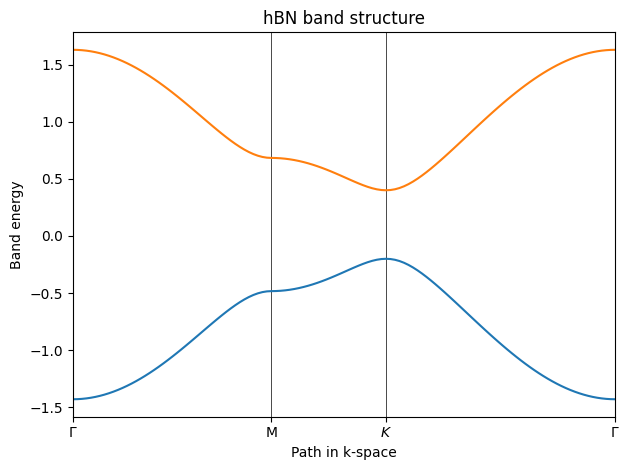

In [79]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.5,np.sqrt(3.0)/2.0,0.0],[0.0,0.0,10.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3., 0.0],[2./3.,2./3., 0.0]]

# make two dimensional tight-binding graphene model
my_model=tb_model(3,3,lat,orb)

# set model parameters
delta=.2
t=.5

# set on-site energies
my_model.set_onsite([-delta,2*delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1, 0])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.0],[.5,.5,0.0],[2/3,1/3,0.0],[0.,0.,0.0]]
# labels of the nodes
label=(r'$\Gamma $',r'M', r'$K$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])
# ax.plot(k_dist, evals[1]-evals[0], c='red')
# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

# Model from Galvani Palear

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,    10.0 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ,     0.0 ]
 #  1  ===>  [  0.6667 ,  0.6667 ,     0.0 ]
site energies:
 #  0  ===>    -3.625
 #  1  ===>     3.625
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      2.3 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ,  0 ] >     ===>      2.3 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ,  0 ] >     ===>      2.3 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  

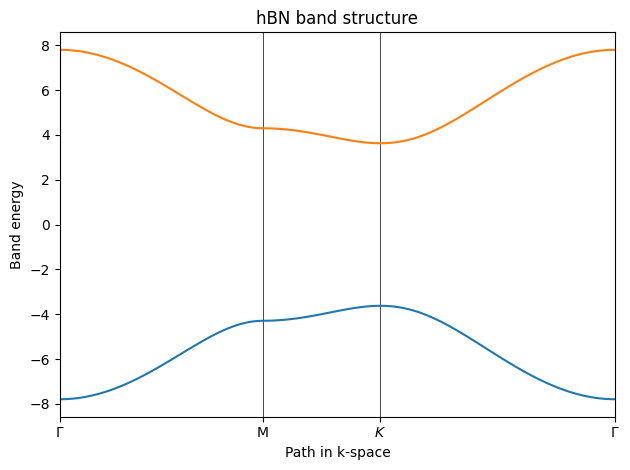

In [98]:
#!/usr/bin/env python
 
# Toy graphene model
 
# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)
 
from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt
 
# define lattice vectors
lat=[[1.0,0.0,0.0],[0.5,np.sqrt(3.0)/2.0,0.0],[0.0,0.0,10.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3., 0.0],[2./3.,2./3., 0.0]]
 
# make two dimensional tight-binding graphene model
my_model=tb_model(3,3,lat,orb)
 
# set model parameters
delta=3.625
t=2.30
 
# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1, 0])
 
# print tight-binding model
my_model.display()
 
# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.0],[.5,.5,0.0],[2/3,1/3,0.0],[0.,0.,0.0]]
# labels of the nodes
label=(r'$\Gamma $',r'M', r'$K$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121
 
# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node
 
print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')
 
# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)
 
# figure for bandstructure
 
fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
 
# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])
# ax.plot(k_dist, evals[1]-evals[0], c='red')
# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")
 
print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     0.0 ,     0.5 ,     0.5 ]
 #  1  ===>  [     0.5 ,     0.0 ,     0.5 ]
 #  2  ===>  [     0.5 ,     0.5 ,     0.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     0.5 ,     0.5 ]
site energies:
 #  0  ===>      -6.0
 #  1  ===>       2.0
hoppings:
<  0 | H |  0 + [  1 ,  0 ,  0 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  1 ,  0 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  0 ,  1 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  0 | H |  1 + [  1 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  0 | H |  1 + [  0 ,  1 ,  0 

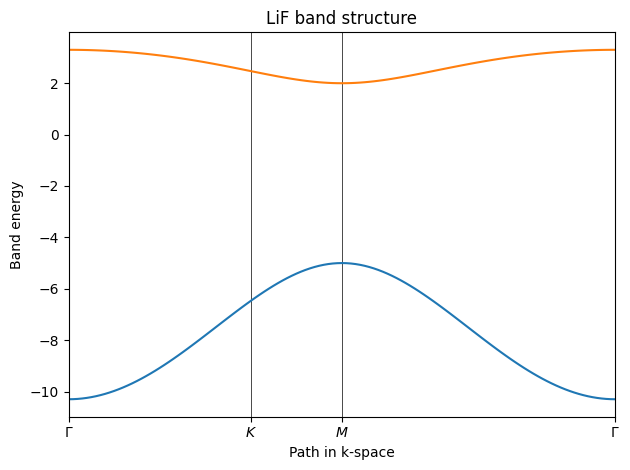

In [80]:
#!/usr/bin/env python

# Toy graphene my_model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB my_model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat = [[0.0, 0.5, 0.5],
       [0.5, 0.0, 0.5],
       [0.5, 0.5, 0.0]]
# define coordinates of orbitals
orb = [[0.0, 0.0, 0.0],  # Fluorine site
       [0.5, 0.5, 0.5]]  # Lithium site

# make two dimensional tight-binding graphene my_model
my_model=tb_model(3,3,lat,orb)

# set my_model parameters
E_F_2p = -6.0  # Example energy for F 2p orbital (in eV)
E_Li_2s = 2.0  # Example energy for Li 2s orbital (in eV)

t_FF=-0.5
t_LiF=1.0

# Set the on-site energies
my_model.set_onsite([E_F_2p, E_Li_2s])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
# Add hopping between Fluorine p-orbitals (nearest neighbors in FCC)
my_model.set_hop(t_FF, 0, 0, [1, 0, 0])
my_model.set_hop(t_FF, 0, 0, [0, 1, 0])
my_model.set_hop(t_FF, 0, 0, [0, 0, 1])

# Add hopping between Lithium and Fluorine
my_model.set_hop(t_LiF, 0, 1, [0, 0, 0])  # between Li and F
my_model.set_hop(t_LiF, 0, 1, [1, 0, 0])
my_model.set_hop(t_LiF, 0, 1, [0, 1, 0])
my_model.set_hop(t_LiF, 0, 1, [0, 0, 1])

# print tight-binding my_model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.],[1./3.,1./3,0.],[0.5,0.5,0.],[0.,0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_my_model: the pythtb my_model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# set vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("LiF band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])


# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

In [99]:
class tmp_lat():
    def __init__(self,lat):
        self.lat = np.array(lat)
        self.lat_vol = np.abs(np.dot(self.lat[2],np.cross(self.lat[0],self.lat[1])))
        self.rec_lat = self._rec_lat()
        self.rlat_vol = np.abs(np.dot(self.rec_lat[2],np.cross(self.rec_lat[0],self.rec_lat[1])))
    
    def _rec_lat(self):
        b1 = 2 * np.pi * np.cross(self.lat[1], self.lat[2]) / self.lat_vol
        b2 = 2 * np.pi * np.cross(self.lat[2], self.lat[0]) / self.lat_vol
        b3 = 2 * np.pi * np.cross(self.lat[0], self.lat[1]) / self.lat_vol

        # Combine the reciprocal lattice vectors into a matrix
        B = np.array([b1, b2, b3])        
        return B

In [100]:
c_lat = tmp_lat(lat)

In [101]:
from yambopy import *
nnkp_kgrid = tb_Monkhorst_Pack(nx = 10 , ny = 10 , nz = 1, latdb=c_lat, nkpt=[10,10,1], parent=c_lat.lat, trs=False)
nnkp_qgrid = tb_Monkhorst_Pack(nx = 5 , ny = 5, nz = 1, latdb=c_lat, nkpt = [5,5,1], parent = c_lat.lat, trs=False )

In [84]:
import numpy as np

def _generate_k_grid(nx,ny,nz, shift):
    # Generate indices for the k-point grid
    n1 = np.arange(nx)
    n2 = np.arange(ny)
    n3 = np.arange(nz)
    
    # Create meshgrid for all combinations of n1, n2, n3
    n1, n2, n3 = np.meshgrid(n1, n2, n3, indexing='ij')
    
    # Compute the k-points in reduced coordinates
    kx = n1.ravel() / nx + shift[0]
    ky = n2.ravel() / ny + shift[1]
    kz = n3.ravel() / nz + shift[2]
    
    # Combine the kx, ky, kz into a single array
    k_grid = np.vstack((kx, ky, kz)).T
    
    return k_grid


In [102]:
qlist = k_list(q_vec, c_lat)

In [54]:
nnkp_kgrid.k

array([[-0.4, -0.4,  0. ],
       [-0.4, -0.3,  0. ],
       [-0.4, -0.2,  0. ],
       [-0.4, -0.1,  0. ],
       [-0.4,  0. ,  0. ],
       [-0.4,  0.1,  0. ],
       [-0.4,  0.2,  0. ],
       [-0.4,  0.3,  0. ],
       [-0.4,  0.4,  0. ],
       [-0.4,  0.5,  0. ],
       [-0.3, -0.4,  0. ],
       [-0.3, -0.3,  0. ],
       [-0.3, -0.2,  0. ],
       [-0.3, -0.1,  0. ],
       [-0.3,  0. ,  0. ],
       [-0.3,  0.1,  0. ],
       [-0.3,  0.2,  0. ],
       [-0.3,  0.3,  0. ],
       [-0.3,  0.4,  0. ],
       [-0.3,  0.5,  0. ],
       [-0.2, -0.4,  0. ],
       [-0.2, -0.3,  0. ],
       [-0.2, -0.2,  0. ],
       [-0.2, -0.1,  0. ],
       [-0.2,  0. ,  0. ],
       [-0.2,  0.1,  0. ],
       [-0.2,  0.2,  0. ],
       [-0.2,  0.3,  0. ],
       [-0.2,  0.4,  0. ],
       [-0.2,  0.5,  0. ],
       [-0.1, -0.4,  0. ],
       [-0.1, -0.3,  0. ],
       [-0.1, -0.2,  0. ],
       [-0.1, -0.1,  0. ],
       [-0.1,  0. ,  0. ],
       [-0.1,  0.1,  0. ],
       [-0.1,  0.2,  0. ],
 

In [103]:
# we need a temporary model class to call H2P without initializing wann_model
class mytb_model():
    def __init__(self, pythtb_model, nc, nv, nnkp_kgrid, eigv, eigvec):
        self.nk = nnkp_kgrid.k.shape[0]
        self.mpgrid = nnkp_kgrid
        self.nb = eigv.shape[1]
        self.nc = nc 
        self.nv = nv
        self.eigv = eigv
        self.eigvec = eigvec
        self._get_T_table()
        self.pythtb_model = pythtb_model

    def _get_T_table(self):
        ntransitions = self.nk*self.nc*self.nv
        T_table = np.zeros((ntransitions, 3),dtype=int)
        t_index = 0
        for ik in range(0,self.nk):
            for iv in range(0,self.nv):
                for ic in range(0,self.nc):
                        T_table[t_index] = [ik, iv, self.nv+ic]
                        t_index += 1
        self.ntransitions = ntransitions
        self.T_table = T_table

In [87]:
h2p_bnd.h2peigv[:,0]

array([19.42773414+0.j, 16.83609818+0.j, 17.32323571+0.j, 18.0698456 +0.j,
       19.0103768 +0.j, 18.80967072+0.j, 17.9029747 +0.j, 17.20294061+0.j,
       16.77529664+0.j, 16.67273817+0.j, 16.90968864+0.j, 17.45393036+0.j,
       18.24443915+0.j, 19.21652704+0.j, 18.61481936+0.j, 17.74434297+0.j,
       17.09357876+0.j, 16.72762915+0.j, 16.69337463+0.j, 16.99566553+0.j,
       17.59448124+0.j, 18.4262566 +0.j, 19.42773414+0.j, 18.4262566 +0.j,
       17.59448124+0.j, 16.99566553+0.j, 16.69337463+0.j, 16.72762915+0.j,
       17.09357876+0.j, 17.74434297+0.j, 18.61481936+0.j, 19.21652704+0.j,
       18.24443915+0.j, 17.45393036+0.j, 16.90968864+0.j, 16.67273817+0.j,
       16.77529664+0.j, 17.20294061+0.j, 17.9029747 +0.j, 18.80967072+0.j,
       19.0103768 +0.j, 18.0698456 +0.j, 17.32323571+0.j, 16.83609818+0.j,
       16.66584527+0.j, 16.082623  +0.j, 15.75704148+0.j, 15.75809452+0.j,
       16.10952352+0.j, 16.77905539+0.j, 17.70297302+0.j, 18.81653698+0.j,
       18.81653698+0.j, 1

In [104]:
# get eigenvalues and eigenvectors from pythtb
eigv, eigvec = my_model.solve_all(nnkp_kgrid.k, eig_vectors=True)

In [105]:
# swap axes to match conventions from our yambopy-wannier library
eigv = my_model.solve_all(nnkp_kgrid.k).swapaxes(0,1)
eigvec = eigvec.transpose(1, 2, 0)

In [106]:
# Initialize H2P with this model
model = mytb_model(pythtb_model = my_model, nc=1, nv=1, nnkp_kgrid = nnkp_kgrid, eigv = eigv, eigvec = eigvec)

In [107]:
cpot = CoulombPotentials(v0=0.3,ngrid=[10,10,1], lattice=c_lat, ediel=[1.0,10.0,1.0])

Warning! CoulombPotentials works with atomic units and return energy in eV 

                Check consistency of units in the methods, they have not been properly tested
              


In [108]:
kminusq_grid = tb_Monkhorst_Pack(nx = h2p_bnd.kmpgrid.nx, ny = h2p_bnd.kmpgrid.ny, nz = h2p_bnd.kmpgrid.nz, \
                                latdb = h2p_bnd.kmpgrid.latdb, nkpt = [h2p_bnd.kmpgrid.nx, h2p_bnd.kmpgrid.ny, h2p_bnd.kmpgrid.nz],\
                                parent = h2p_bnd.kmpgrid.latdb.lat, displacement = h2p_bnd.qlist.k[35],\
                                trs=False)

In [109]:
# we can call this only with 
h2p_bnd = H2P(model, qmpgrid = nnkp_qgrid, method = 'model', cpot = cpot, ctype='v2dt2',bse_bands=True, qlist=qlist,ktype='IP', K_ex =0.0, K_d=0.0)
h2p = H2P(model, qmpgrid = nnkp_qgrid, method = 'model', cpot = cpot, ctype='v2dt2', bse_bands=False, ktype = 'IP', K_ex = 0.0, K_d = 0.0)


 Building H2P from model Coulomb potentials. Default is v2dt2

computing bse bands 

 Building H2P from model Coulomb potentials. Default is v2dt2



In [110]:
h2p_bnd.solve_H2P()
h2p.solve_H2P()

Setting number of qpoints equal to number of q points in the list

Diagonalizing the H2P matrix with dimensions: 100 for q-point: 0


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 1


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 2


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 3


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 4


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 5


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 6


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 7


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 8


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 9


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 10


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 11


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 12


Diagonalizing the H2P matrix with dimensions: 100 for q-poi

In [111]:
h2p.h2peigv[0]

array([ 8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,
        8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,
        8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,
        8.6341875 +0.j,  8.6341875 +0.j,  8.6341875 +0.j,  8.6341875 +0.j,
        8.80351751+0.j,  8.80351751+0.j,  8.80351751+0.j,  8.80351751+0.j,
        9.08893427+0.j,  9.08893427+0.j,  9.08893427+0.j,  9.08893427+0.j,
        9.36667148+0.j,  9.36667148+0.j,  9.36667148+0.j,  9.36667148+0.j,
        9.36667148+0.j,  9.36667148+0.j,  9.36667148+0.j,  9.36667148+0.j,
        9.47900811+0.j,  9.47900811+0.j,  9.47900811+0.j,  9.47900811+0.j,
        9.48089139+0.j,  9.48089139+0.j,  9.8593756 +0.j,  9.8593756 +0.j,
        9.8593756 +0.j,  9.8593756 +0.j, 10.39038494+0.j, 10.39038494+0.j,
       10.42252957+0.j, 10.42252957+0.j, 10.42252957+0.j, 10.42252957+0.j,
       10.42252957+0.j, 10.42252957+0.j, 10.42252957+0.j, 10.42252957+0.j,
       10.68560639+0.j, 1

In [112]:
q_dist

array([0.        , 0.0131216 , 0.02624319, 0.03936479, 0.05248639,
       0.06560799, 0.07872958, 0.09185118, 0.10497278, 0.11809437,
       0.13121597, 0.14433757, 0.15745916, 0.17058076, 0.18370236,
       0.19682396, 0.20994555, 0.22306715, 0.23618875, 0.24931034,
       0.26243194, 0.27555354, 0.28867513, 0.30179673, 0.31491833,
       0.32803993, 0.34116152, 0.35428312, 0.36740472, 0.38052631,
       0.39364791, 0.40676951, 0.4198911 , 0.4330127 , 0.4461343 ,
       0.4592559 , 0.47237749, 0.48549909, 0.49862069, 0.51174228,
       0.52486388, 0.53798548, 0.55110708, 0.56422867, 0.57735027,
       0.5906836 , 0.60401694, 0.61735027, 0.6306836 , 0.64401694,
       0.65735027, 0.6706836 , 0.68401694, 0.69735027, 0.7106836 ,
       0.72401694, 0.73735027, 0.7506836 , 0.76401694, 0.77735027,
       0.7906836 , 0.80401694, 0.81735027, 0.8306836 , 0.84401694,
       0.85735027, 0.8706836 , 0.88401694, 0.89735027, 0.9106836 ,
       0.9237555 , 0.93682739, 0.94989929, 0.96297118, 0.97604

In [121]:
h2p_bnd.h2peigv[1]

array([ 7.38170018+0.j,  7.38170018+0.j,  7.48548616+0.j,  7.48548616+0.j,
        7.62649287+0.j,  7.62649287+0.j,  7.68748005+0.j,  7.68748005+0.j,
        7.85141493+0.j,  7.85141493+0.j,  7.92365787+0.j,  7.92365787+0.j,
        8.32126823+0.j,  8.32126823+0.j,  8.34499674+0.j,  8.34499674+0.j,
        8.41558866+0.j,  8.41558866+0.j,  8.47602517+0.j,  8.47602517+0.j,
        8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,
        8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,  8.58618076+0.j,
        8.58618076+0.j,  8.58618076+0.j,  8.65784364+0.j,  8.76352129+0.j,
        8.76352129+0.j,  8.81931441+0.j,  8.81931441+0.j,  8.8826166 +0.j,
        8.8826166 +0.j,  8.90345688+0.j,  8.90345688+0.j,  9.21079426+0.j,
        9.31403267+0.j,  9.31403267+0.j,  9.62997106+0.j,  9.62997106+0.j,
        9.78255315+0.j,  9.78255315+0.j,  9.83588849+0.j,  9.84343065+0.j,
        9.84343065+0.j, 10.01509797+0.j, 10.01509797+0.j, 10.03968892+0.j,
       10.03968892+0.j, 1

Done.



/Users/Reho0001/opt/anaconda3/envs/tbmodels/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Reho0001/opt/anaconda3/envs/tbmodels/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


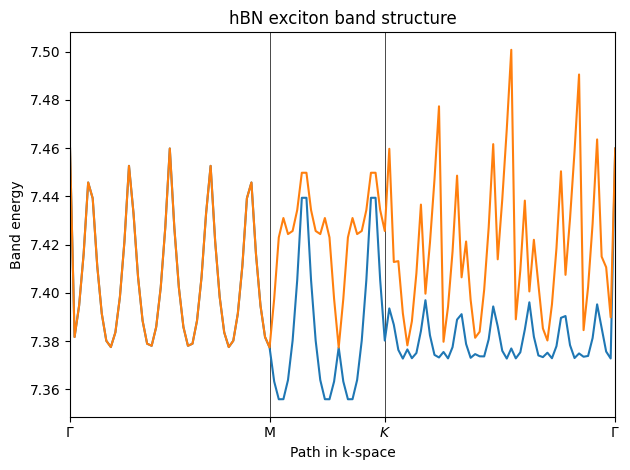

In [113]:
fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN exciton band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
for it in range(0,2):#h2p_tmp.h2peigv.shape[1]):
    ax.plot(q_dist,h2p_bnd.h2peigv[:,it])

# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

In [116]:
q_dist

array([0.        , 0.0131216 , 0.02624319, 0.03936479, 0.05248639,
       0.06560799, 0.07872958, 0.09185118, 0.10497278, 0.11809437,
       0.13121597, 0.14433757, 0.15745916, 0.17058076, 0.18370236,
       0.19682396, 0.20994555, 0.22306715, 0.23618875, 0.24931034,
       0.26243194, 0.27555354, 0.28867513, 0.30179673, 0.31491833,
       0.32803993, 0.34116152, 0.35428312, 0.36740472, 0.38052631,
       0.39364791, 0.40676951, 0.4198911 , 0.4330127 , 0.4461343 ,
       0.4592559 , 0.47237749, 0.48549909, 0.49862069, 0.51174228,
       0.52486388, 0.53798548, 0.55110708, 0.56422867, 0.57735027,
       0.5906836 , 0.60401694, 0.61735027, 0.6306836 , 0.64401694,
       0.65735027, 0.6706836 , 0.68401694, 0.69735027, 0.7106836 ,
       0.72401694, 0.73735027, 0.7506836 , 0.76401694, 0.77735027,
       0.7906836 , 0.80401694, 0.81735027, 0.8306836 , 0.84401694,
       0.85735027, 0.8706836 , 0.88401694, 0.89735027, 0.9106836 ,
       0.9237555 , 0.93682739, 0.94989929, 0.96297118, 0.97604

In [119]:
evals[1]

array([7.79426873, 7.79080944, 7.78044001, 7.76318573, 7.73908886,
       7.70820869, 7.67062175, 7.62642199, 7.57572107, 7.51864866,
       7.45535284, 7.38600057, 7.31077822, 7.22989214, 7.14356946,
       7.05205882, 6.95563129, 6.85458146, 6.74922854, 6.63991766,
       6.52702129, 6.41094081, 6.29210815, 6.17098759, 6.04807763,
       5.92391285, 5.7990658 , 5.67414866, 5.54981471, 5.42675929,
       5.30572006, 5.18747622, 5.07284653, 4.96268531, 4.85787649,
       4.75932478, 4.6679439 , 4.58464149, 4.51030065, 4.44575852,
       4.39178252, 4.34904556, 4.31810182, 4.29936487, 4.29309038,
       4.29093001, 4.28446895, 4.2737674 , 4.25892602, 4.2400864 ,
       4.21743168, 4.19118732, 4.16162201, 4.12904864, 4.09382522,
       4.05635585, 4.01709138, 3.97652981, 3.93521619, 3.8937418 ,
       3.85274235, 3.81289497, 3.77491358, 3.73954247, 3.70754774,
       3.67970638, 3.65679313, 3.63956504, 3.62874429, 3.625     ,
       3.62877558, 3.64040785, 3.66028124, 3.68867347, 3.72574

In [120]:
evals[1][1]-evals[0,0]

15.58507816867278

In [57]:
h2p.write_exc_overlap(seedname='model_exc',trange=np.arange(0,2), tprange=np.arange(0,2))
h2p.write_exc_eig(seedname='model_exc',trange=np.arange(0,2))
h2p.write_exc_nnkp(seedname='model_exc',trange=np.arange(0,2))
h2p.write_exc_amn(seedname='model_exc',trange=np.arange(0,2))


NameError: name 'h2p' is not defined

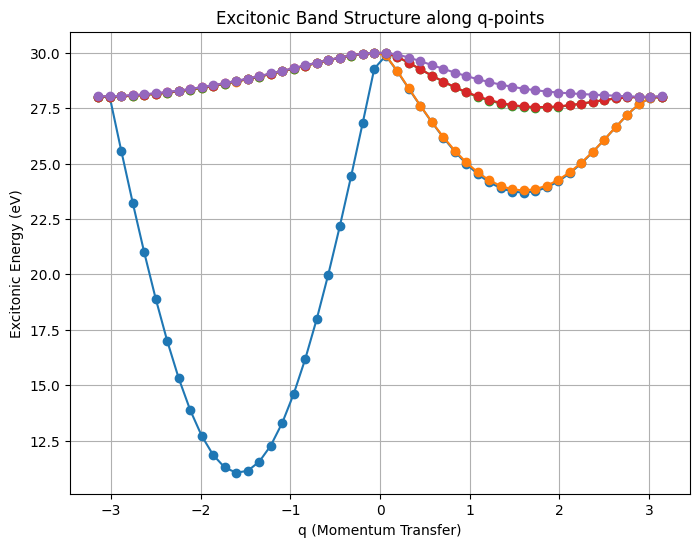

In [105]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Parameters
t_v = 1.0  # Bandwidth for valence band (eV)
t_c = 1.5  # Bandwidth for conduction band (eV)
V_direct = 10.0  # Direct Coulomb interaction (eV)
W_screened = -0.6  # Screened Coulomb interaction (eV)
k_points = np.linspace(-np.pi, np.pi, 100)  # Discrete k-points in 1D

# Define the dispersion relations
def epsilon_v(k):
    return 10.0 + t_v * np.cos(k)

def epsilon_c(k):
    return 40.5 + t_c * np.cos(k)

# Define the BSE kernel (simplified)
def BSE_kernel(k, k_prime, q):
    return V_direct * np.cos(k - k_prime) + W_screened * np.cos(k + q - k_prime)

# List of q-points along which we compute the band structure
q_points = np.linspace(-np.pi, np.pi, 50)

# Container for excitonic energies
excitonic_energies = np.zeros((len(q_points),len(k_points)))

# Loop over q-points to compute the excitonic energies
for iq,q_point in enumerate(q_points):
    # Construct the BSE Hamiltonian for the current q-point
    H_BSE_res = np.zeros((len(k_points), len(k_points)))

    for i, k in enumerate(k_points):
        for j, k_prime in enumerate(k_points):
            # Quasiparticle energy difference
            Delta_E_kq = epsilon_c(k + q_point) - epsilon_v(k)
            # BSE kernel
            K_kq = BSE_kernel(k, k_prime, q_point)
            # Fill the Hamiltonian matrix
            H_BSE_res[i, j] = Delta_E_kq * (i == j) + K_kq

    # Diagonalize the BSE Hamiltonian to find excitonic states
    E_exciton, psi_exciton = eigh(H_BSE_res)

    # Store the lowest excitonic energy for this q-point
    excitonic_energies[iq,:] = E_exciton[:]  # Save the lowest exciton energy

# Convert to numpy array for plotting
excitonic_energies = np.array(excitonic_energies)

# Plotting the band structure along q-points
plt.figure(figsize=(8, 6))
plt.plot(q_points, excitonic_energies[:,:5], 'o-')#, label='Excitonic Band')
plt.xlabel('q (Momentum Transfer)')
plt.ylabel('Excitonic Energy (eV)')
plt.title('Excitonic Band Structure along q-points')
plt.grid(True)
#plt.ylim([0,10])
#plt.legend()
plt.show()


In [52]:
h2p_tmp.qlist.k

array([[0.        , 0.        , 0.        ],
       [0.00833333, 0.00833333, 0.        ],
       [0.01666667, 0.01666667, 0.        ],
       [0.025     , 0.025     , 0.        ],
       [0.03333333, 0.03333333, 0.        ],
       [0.04166667, 0.04166667, 0.        ],
       [0.05      , 0.05      , 0.        ],
       [0.05833333, 0.05833333, 0.        ],
       [0.06666667, 0.06666667, 0.        ],
       [0.075     , 0.075     , 0.        ],
       [0.08333333, 0.08333333, 0.        ],
       [0.09166667, 0.09166667, 0.        ],
       [0.1       , 0.1       , 0.        ],
       [0.10833333, 0.10833333, 0.        ],
       [0.11666667, 0.11666667, 0.        ],
       [0.125     , 0.125     , 0.        ],
       [0.13333333, 0.13333333, 0.        ],
       [0.14166667, 0.14166667, 0.        ],
       [0.15      , 0.15      , 0.        ],
       [0.15833333, 0.15833333, 0.        ],
       [0.16666667, 0.16666667, 0.        ],
       [0.175     , 0.175     , 0.        ],
       [0.

In [46]:
evals[1]-evals[0]

array([7.21110255, 7.209582  , 7.20502258, 7.19743103, 7.1868186 ,
       7.17320104, 7.15659865, 7.13703628, 7.11454337, 7.089154  ,
       7.06090691, 7.02984559, 6.99601829, 6.9594781 , 6.92028303,
       6.87849609, 6.83418537, 6.78742413, 6.73829088, 6.68686956,
       6.63324958, 6.57752598, 6.51979956, 6.46017702, 6.39877112,
       6.33570081, 6.27109138, 6.20507465, 6.13778913, 6.06938014,
       6.        , 5.92980815, 5.85897129, 5.78766348, 5.71606621,
       5.64436846, 5.57276665, 5.50146461, 5.43067341, 5.36061116,
       5.29150262, 5.2235788 , 5.1570763 , 5.09223662, 5.02930515,
       4.96853011, 4.91016118, 4.85444792, 4.80163806, 4.75197547,
       4.70569799, 4.66303502, 4.62420509, 4.58941316, 4.55884807,
       4.53267987, 4.51105735, 4.49410576, 4.48192477, 4.47458685,
       4.47213595, 4.47458685, 4.48192477, 4.49410576, 4.51105735,
       4.53267987, 4.55884807, 4.58941316, 4.62420509, 4.66303502,
       4.70569799, 4.75197547, 4.80163806, 4.85444792, 4.91016

In [24]:
def monkhorst_pack_grid(n):
    """
    Genera una griglia di n punti uniforme tipo Monkhorst-Pack, centrata sull'origine e che include sempre l'origine.

    Args:
        n: Numero di punti lungo ciascun asse della griglia.

    Returns:
        Un array NumPy di forma (n, n, 3) contenente le coordinate dei punti della griglia.
    """

    # Calcola l'offset per centrare la sequenza sullo zero
    offset = 0.5 if n % 2 == 0 else 0.5 * (n - 1) / n 

    # Genera una sequenza di n valori equispaziati tra -0.5 e 0.5, centrata sullo zero
    linspace = np.linspace(-0.5 + offset, 0.5 - offset, n, endpoint=True)

    # Crea una griglia 2D utilizzando meshgrid
    x, y = np.meshgrid(linspace, linspace)

    # Combina le coordinate x e y con una terza coordinata z pari a zero
    grid = np.stack((x, y, np.zeros_like(x)), axis=-1)

    return grid

In [25]:
grid = monkhorst_pack_grid(4)

In [26]:
grid

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [51]:
h2p_tmp.h2peigv[5]

array([4.0446416 +0.j, 4.0446416 +0.j, 4.08261212+0.j, 4.08261212+0.j,
       4.13617957+0.j, 4.13617957+0.j, 4.14952401+0.j, 4.14952401+0.j,
       4.2128033 +0.j, 4.2128033 +0.j, 4.23902735+0.j, 4.23902735+0.j,
       4.3702625 +0.j, 4.3702625 +0.j, 4.38010722+0.j, 4.38010722+0.j,
       4.4060346 +0.j, 4.4060346 +0.j, 4.43129496+0.j, 4.43129496+0.j,
       4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j,
       4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j, 4.47213595+0.j,
       4.47213595+0.j, 4.47213595+0.j, 4.50240791+0.j, 4.54198975+0.j,
       4.54198975+0.j, 4.56577645+0.j, 4.56577645+0.j, 4.58965937+0.j,
       4.58965937+0.j, 4.59859002+0.j, 4.59859002+0.j, 4.69552561+0.j,
       4.7346264 +0.j, 4.7346264 +0.j, 4.86154593+0.j, 4.86154593+0.j,
       4.90566599+0.j, 4.90566599+0.j, 4.92905494+0.j, 4.92905494+0.j,
       4.94693734+0.j, 4.99237733+0.j, 4.99237733+0.j, 5.0081596 +0.j,
       5.0081596 +0.j, 5.08280279+0.j, 5.08280279+0.j, 5.13690887+0.j,
      

ValueError: x and y must have same first dimension, but have shapes (121,) and (100,)

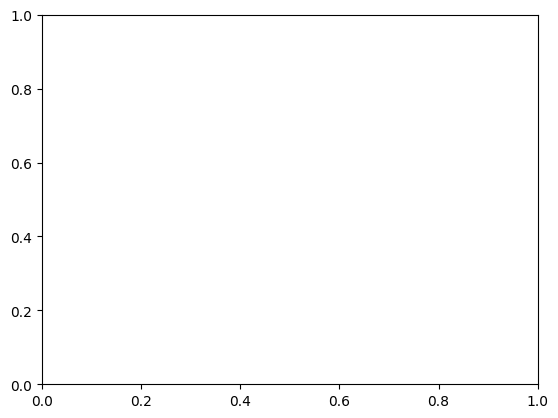

In [28]:
fig,ax = plt.subplots()

ax.plot(k_dist,h2p_tmp.h2peigv[0,:])

In [16]:
!pwd

/Users/Reho0001/workQE/Projects/mlxwf


# TBmodels

In [124]:
import tbmodels
import itertools

model = tbmodels.Model(
    on_site=[1, -1], dim=3, occ=1, pos=[[0.0, 0.0, 0.0], [0.5, 0.5, 0.0]]
)

t1, t2 = (0.1, 0.2)
for phase, R in zip([1, -1j, 1j, -1], itertools.product([0, -1], [0, -1], [0])):
    model.add_hop(t1 * phase, 0, 1, R)

for R in ((r[0], r[1], 0) for r in itertools.permutations([0, 1])):
    model.add_hop(t2, 0, 0, R)
    model.add_hop(-t2, 1, 1, R)

In [129]:
# Define path in reduced coordinates using Class Path
npoints = 30
path_kpoints = Path([[[  0.5,  0.500,  0.500],'L'], 
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W'],
              [[  0.5,  0.500,  0.500],'L']],[26,30,15,21] )
              #[[  0.750,  0.250,  0.5],'W2'],
              
kpoints_red = path_kpoints.get_klist()[:,0:3]
kpoints_car = red_car(kpoints_red, c_lat.rec_lat)
kdistance = path_kpoints.distances
kpoints = path_kpoints.kpoints
Eexc_k= np.array(model.eigenval(kpoints_red))
tb_ebands = YambopyBandStructure(Eexc_k,kpoints_red,kpath=path_kpoints)
tb_kdist = tb_ebands.distances
nbands = Eexc_k.shape[1]
nkpoints = Eexc_k.shape[0]

Text(0, 0.5, 'E [eV]')

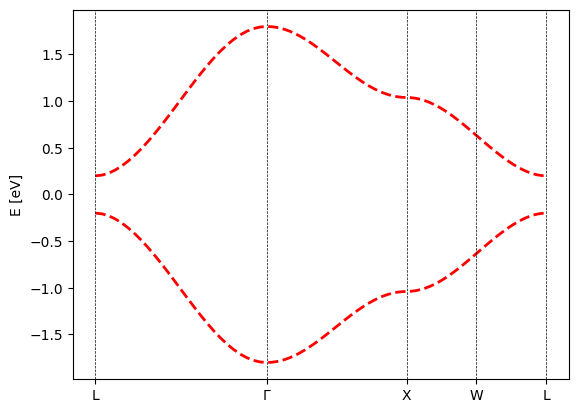

In [130]:
fig,ax = plt.subplots()

for ib in range(nbands):
  ax.plot(tb_kdist, Eexc_k[:,ib], c='red', ls = '--', lw=2.0)
tb_eb = tb_ebands.add_kpath_labels(ax)
# ax.plot(qe_en, qe_bands)
ax.set_ylabel('E [eV]')
#plt.savefig('/Users/Reho0001/tmp/wann_excbadstest.png', bbox_inches='tight')

In [109]:
# On-site energies
E_v1 = -6.0  # Example energy for first valence band (p_x orbital)
E_v2 = -6.0  # Example energy for second valence band (p_y orbital)
E_v3 = -6.0  # Example energy for third valence band (p_z orbital)
E_c = 2.0    # Example energy for conduction band (s orbital)

# Set the on-site energies
model.set_onsite([E_v1, E_v2, E_v3, E_c])

# Hopping parameters
t_vv = -0.5  # Hopping between valence orbitals (p-p hopping)
t_vc = 1.0   # Hopping between valence and conduction orbitals (p-s hopping)
t_cc = -0.5  # Hopping within conduction band (s-s hopping)

# Add intra-valence band (p_x, p_y, p_z) hopping terms
model.add_hop(t_vv, 0, 0, [1, 0, 0])  # p_x-p_x hopping in x-direction
model.add_hop(t_vv, 1, 1, [1, 0, 0])  # p_y-p_y hopping in x-direction
model.add_hop(t_vv, 2, 2, [1, 0, 0])  # p_z-p_z hopping in x-direction

model.add_hop(t_vv, 0, 0, [0, 1, 0])  # p_x-p_x hopping in y-direction
model.add_hop(t_vv, 1, 1, [0, 1, 0])  # p_y-p_y hopping in y-direction
model.add_hop(t_vv, 2, 2, [0, 1, 0])  # p_z-p_z hopping in y-direction

model.add_hop(t_vv, 0, 0, [0, 0, 1])  # p_x-p_x hopping in z-direction
model.add_hop(t_vv, 1, 1, [0, 0, 1])  # p_y-p_y hopping in z-direction
model.add_hop(t_vv, 2, 2, [0, 0, 1])  # p_z-p_z hopping in z-direction

# Add conduction band (s orbital) hopping terms
model.add_hop(t_cc, 3, 3, [1, 0, 0])  # s-s hopping in x-direction
model.add_hop(t_cc, 3, 3, [0, 1, 0])  # s-s hopping in y-direction
model.add_hop(t_cc, 3, 3, [0, 0, 1])  # s-s hopping in z-direction

# Add hopping between valence (p) and conduction (s) orbitals
model.add_hop(t_vc, 0, 3, [0, 0, 0])  # p_x-s hopping
model.add_hop(t_vc, 1, 3, [0, 0, 0])  # p_y-s hopping
model.add_hop(t_vc, 2, 3, [0, 0, 0])  # p_z-s hopping


AttributeError: 'tb_model' object has no attribute 'add_hop'

# Visualize the grid and neighbours

In [18]:
c_lat.lat

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       , 10.       ]])

In [12]:
import sisl
tbmp_kgrid = sisl.physics.MonkhorstPack(nkpt=[5,5,1], parent=c_lat.lat, trs=False, displacement=[0.1,0.2,0.3])

In [16]:
len(tbmp_kgrid.k)*8

200

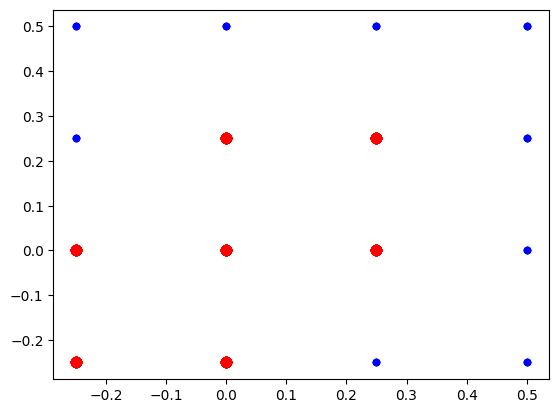

In [7]:
from yambopy import *
tbmp_kgrid = tb_Monkhorst_Pack(nx=4,ny=4,nz=4,latdb=c_lat, parent = c_lat.lat,nkpt=[4,4,4], trs=False)
fig,ax = plt.subplots()
neigh = tbmp_kgrid.b_grid
for ik,k in enumerate(tbmp_kgrid.k):
    ax.scatter(k[0], k[1], s = 20, c='blue')
    for j in range(0,8):
        ax.scatter(neigh[8*ik+j,0],neigh[8*ik+j,1], s=50,c = 'red')

In [15]:
for ik, k in enumerate(tbmp_kgrid.b_grid):
    if (k[0]==0.0 and k[1]==0.0 and k[2]==0.0): print('ciao')

In [9]:
sisl_grid = sisl.physics.MonkhorstPack(nkpt=[6,6,6],parent=c_lat.lat, trs=False)

In [16]:
tbmp_kgrid.k

array([[-0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.  ],
       [-0.25, -0.25,  0.25],
       [-0.25, -0.25,  0.5 ],
       [-0.25,  0.  , -0.25],
       [-0.25,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.25],
       [-0.25,  0.  ,  0.5 ],
       [-0.25,  0.25, -0.25],
       [-0.25,  0.25,  0.  ],
       [-0.25,  0.25,  0.25],
       [-0.25,  0.25,  0.5 ],
       [-0.25,  0.5 , -0.25],
       [-0.25,  0.5 ,  0.  ],
       [-0.25,  0.5 ,  0.25],
       [-0.25,  0.5 ,  0.5 ],
       [ 0.  , -0.25, -0.25],
       [ 0.  , -0.25,  0.  ],
       [ 0.  , -0.25,  0.25],
       [ 0.  , -0.25,  0.5 ],
       [ 0.  ,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.5 ],
       [ 0.  ,  0.25, -0.25],
       [ 0.  ,  0.25,  0.  ],
       [ 0.  ,  0.25,  0.25],
       [ 0.  ,  0.25,  0.5 ],
       [ 0.  ,  0.5 , -0.25],
       [ 0.  ,  0.5 ,  0.  ],
       [ 0.  ,  0.5 ,  0.25],
       [ 0.  ,  0.5 ,  0.5 ],
       [ 0.25, -0.25, -0.25],
       [ 0

In [24]:
tbmp_kgrid.k[51]

array([ 0.5 , -0.25,  0.5 ])

In [23]:
tbmp_kgrid.find_closest_kpoint([0.5 ,  0.75,  0.5 ])

51

# Build H2P and compute exciton band structure

In [9]:
def in_primitive(karray) -> np.ndarray:
    """Move the k-point into the primitive point(s) ]-0.5 ; 0.5]

    Parameters
    ----------
    k : array_like
        k-point(s) to move into the primitive cell

    Returns
    -------
    numpy.ndarray
        all k-points moved into the primitive cell
    """
    k = karray % 1.0

    # Ensure that we are in the interval ]-0.5; 0.5]
    k[k > 0.5] -= 1

    return k

In [23]:
in_primitive(np.array([0.4,0.5,-0.5,1.5,1.2,0.8,1.]))

array([ 0.4,  0.5,  0.5,  0.5,  0.2, -0.2,  0. ])

In [21]:
def fold_into_bz(points):
    'Fold a point in the first BZ defined in the range [-0.5,0.5]'
    # Applying the modulo operation to shift points within the range [-0.5, 0.5]
    folded_points = points%1.0
    # Correcting points where original points were exactly 0.5 to remain 0.5
    folded_points[folded_points > 0.5] -= 1
    return folded_points

In [75]:
my_model.solve_one([-0.8,0.0,0.0])

array([-48.30335169,  52.30335169])

In [76]:
my_model.solve_one([0.2,0.0,0.0])

array([-48.30335169,  52.30335169])

In [34]:
fold_into_bz(np.array([0.4,0.5,-0.5,1.5,1.2,0.8,1.0,-1.0,-0.8]))

array([ 0.4,  0.5,  0.5,  0.5,  0.2, -0.2,  0. ,  0. ,  0.2])

In [30]:
def fold_into_bz_Gs(k_point, bz_range=(-0.5, 0.5), reciprocal_vectors=None):
    """
    Fold a k-point into the first Brillouin Zone and determine the reciprocal lattice vector G needed.
    
    Parameters:
    - k_point: A point in k-space.
    - bz_range: Tuple indicating the range of the BZ, default is (-0.5, 0.5) for each direction.
    - reciprocal_vectors: A list of reciprocal lattice vectors defining the BZ.
    
    Returns:
    - folded_k_point: The folded k-point within the BZ.
    - G_vector: The reciprocal lattice vector that folds the k-point into the BZ.
    """
    
    k_point = np.array(k_point)
    
    # Determine the G-vector multiplier for folding
    G_multiplier = np.floor((k_point - bz_range[0]) / (bz_range[1] - bz_range[0]))
    # Calculate the G_vector
    if reciprocal_vectors is not None:
        G_vector = np.dot(G_multiplier, reciprocal_vectors)
    else:
        # If no reciprocal lattice vectors are provided, assume a cubic lattice with unit cell length of 1
        G_vector = G_multiplier * (bz_range[1] - bz_range[0])

    # Fold the k_point into the BZ
    folded_k_point = k_point - G_vector
    # Correct for the case when the point is exactly on the upper bound of the BZ
    for i in range(len(folded_k_point)):
        if folded_k_point[i] == bz_range[0] and G_vector[i] >= 1.0:
            folded_k_point[i] += (bz_range[1] - bz_range[0])
            G_vector[i] -= (bz_range[1] - bz_range[0])
        G_vector[i] = -G_vector[i]
        if folded_k_point[i] == bz_range[0]:
            folded_k_point[i] += (bz_range[1]-bz_range[0])
            G_vector[i] = 0
    return folded_k_point, G_vector

In [33]:
fold_into_bz_Gs([0.4,0.5,-0.5,1.5,1.2,0.8,1.0,-1.0,-0.8])

(array([ 0.4,  0.5,  0.5,  0.5,  0.2, -0.2,  0. ,  0. ,  0.2]),
 array([-0., -0.,  0., -1., -1., -1., -1.,  1.,  1.]))

In [29]:
1.2%1

0.19999999999999996